In [100]:
import pandas as pd
import numpy as np
names = [ 'Wilbur', 'Petunia', 'Gregory' ]
a = [ 67, 80, 64 ]
b = [ 56, 90, 50 ]
df = pd.DataFrame({'names':names,'a':a,'b':b})
df.head()

,names,a,b
0,Wilbur,67,56
1,Petunia,80,90
2,Gregory,64,50


In [9]:
def gather( df, key, value, cols ):
    id_vars = [ col for col in df.columns if col not in cols ]
    id_values = cols
    var_name = key
    value_name = value
    return pd.melt( df, id_vars, id_values, var_name, value_name )

In [10]:
gather( df, 'drug', 'heartrate', ['a','b'] )

,names,drug,heartrate
0,Wilbur,a,67
1,Petunia,a,80
2,Gregory,a,64
3,Wilbur,b,56
4,Petunia,b,90
5,Gregory,b,50


In [85]:
churn = pd.read_csv("./../Data/Churn.csv")


   churn  counts
0  False    2850
1   True     483


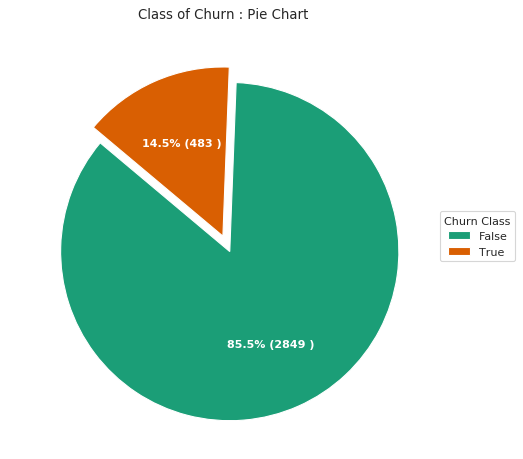

In [97]:
import numpy as np
df = churn.groupby("churn").size().reset_index(name='counts')
# Make the plot with pandas
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['counts']
categories = df['churn']
explode = [0.1 ,0.0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

ax.legend(wedges, categories, title="Churn Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Churn : Pie Chart")
plt.show()


In [98]:
int_type = churn.select_dtypes("int64").columns.tolist()
object_type = churn.select_dtypes("object").columns.tolist()
object_type = list(set(object_type) - set(["churn"]))
types = int_type + object_type
numeric_type = churn.select_dtypes("float").columns.tolist()

# Categorical , Integer 변수 속성별 비율 파악하기 시각화

* https://github.com/mwaskom/seaborn/issues/1027

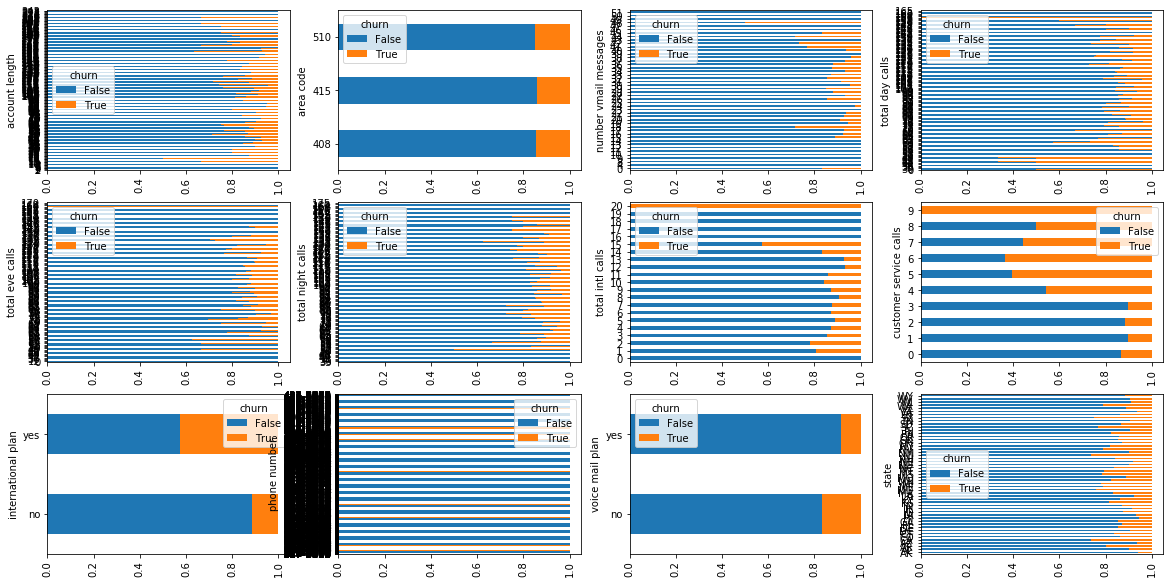

In [46]:
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
for variable, subplot in zip(types , ax.flatten()):
    props = churn.groupby(variable)['churn'].value_counts(normalize=True).unstack()
    props.plot(kind='barh', stacked='True' ,ax = subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## Numerical 변수,  Churn 별로 Boxplot

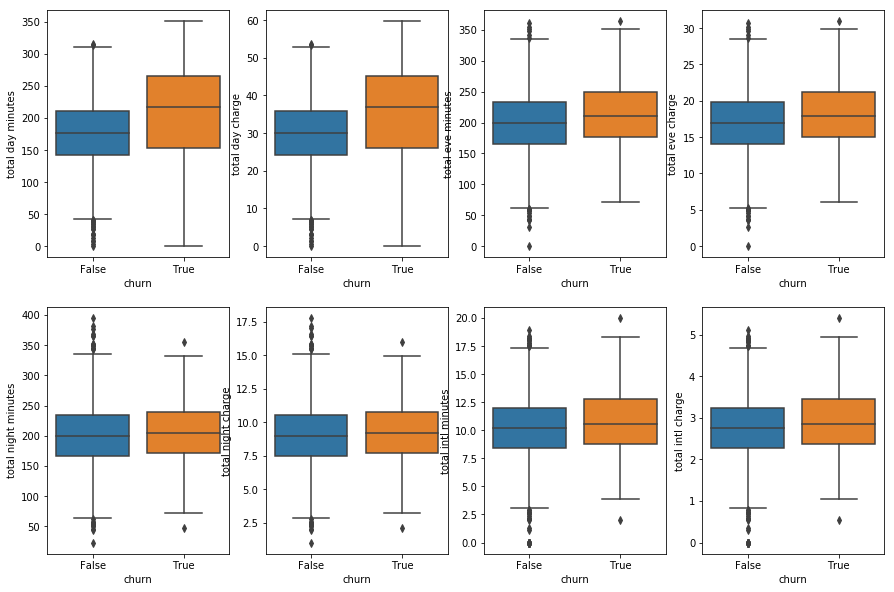

In [52]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
for var, subplot in zip(numeric_type, ax.flatten()):
    sns.boxplot(x='churn' , y = var , data=churn,ax=subplot)

## gather와 boxplot를 사용해서 한꺼번에 시각화해서 보는 방법

In [53]:
numeric_gather = gather( churn , 'key', 'value', numeric_type )

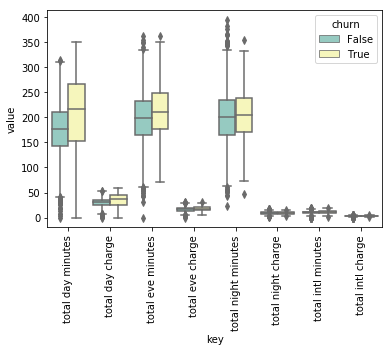

In [60]:
ax = sns.boxplot(x="key", y="value", hue="churn",
                 data=numeric_gather, palette="Set3")
plt.xticks(rotation=90)
plt.show()

## Numeric Scatter Plot도 그리고 Density도 같이 그리기

[Seaborn `hue` 잘 작동 안할 때 참고](https://stackoverflow.com/questions/52103408/seaborn-pairplot-hue-parameter-not-working-as-expected)

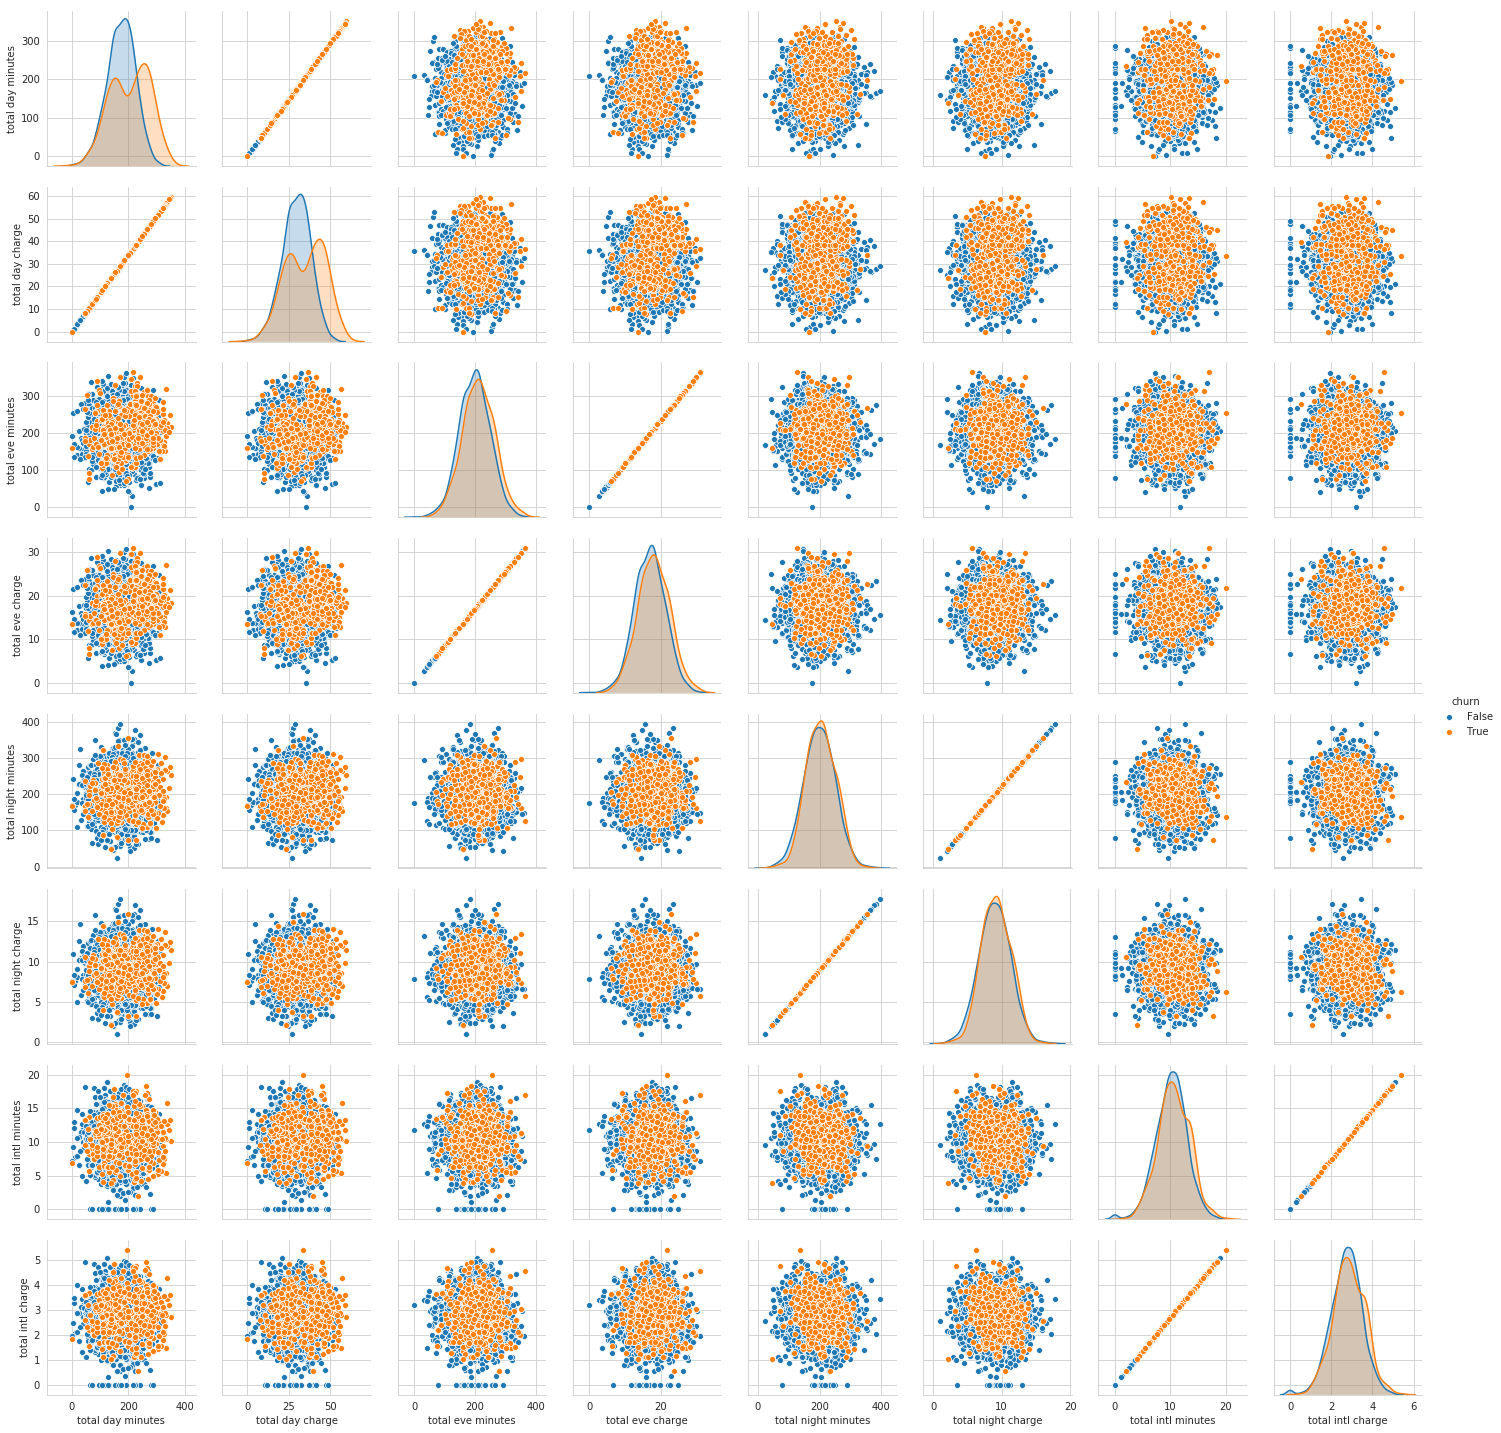

In [79]:
sns.set_style("whitegrid") ; 
sns.pairplot( data = churn  , hue ='churn' ,vars=numeric_type  )